# This project performs a comprehensive financial performance analysis on major companies using SQL, Python, and Pandas.


## The analysis covers revenue growth, profit margins, cashflow behavior, ROE, debt ratios, and multi-year trends.
## The goal is to extract practical business insights and understand financial health.

### step 1 : getting the necessary libraries and providing mysql connection 

In [125]:
import pandas as pd
import mysql.connector


connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ssss1234",
    database="financial_statement"
)


query = "SELECT * FROM financial_analysis;"
df = pd.read_sql(query, connection)

print(df.shape)  
print(df.head()) 

(160, 23)
   Year Company Category  Market_Cap_BUSD   Revenue  Gross_Profit  Net_Income  \
0  2022    AAPL       IT          2066.94  394328.0      170782.0     99803.0   
1  2021    AAPL       IT          2913.28  365817.0      152836.0     94680.0   
2  2020    AAPL       IT          2255.97  274515.0      104956.0     57411.0   
3  2019    AAPL       IT          1304.76  260174.0       98392.0     55256.0   
4  2018    AAPL       IT           748.54  265595.0      101839.0     59531.0   

   Earnings_Per_Share    EBITDA  Shareholder_Equity  ...  Current_Ratio  \
0                6.11  130541.0             50672.0  ...           0.88   
1                5.61  120233.0             63090.0  ...           1.07   
2                3.28   77344.0             65339.0  ...           1.36   
3                2.97   76477.0             90488.0  ...           1.54   
4                2.98   81801.0            107147.0  ...           1.13   

   Debt_Equity_Ratio     ROE    ROA    ROI  Net_Prof

C:\Users\DELL\AppData\Local\Temp\ipykernel_24232\3555615052.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


### step 2 : finding Revenue growth percentages for the companies

In [126]:
df['Revenue_Growth_Percentage']=df.groupby('Company')['Revenue'].pct_change()*100
df[['Company','Year','Revenue','Revenue_Growth_Percentage']].head(10)

Company  Year   Revenue  Revenue_Growth_Percentage
0    AAPL  2022  394328.0                        NaN
1    AAPL  2021  365817.0                  -7.230275
2    AAPL  2020  274515.0                 -24.958381
3    AAPL  2019  260174.0                  -5.224123
4    AAPL  2018  265595.0                   2.083606
5    AAPL  2017  229234.0                 -13.690393
6    AAPL  2016  215639.0                  -5.930621
7    AAPL  2015  233715.0                   8.382528
8    AAPL  2014  182795.0                 -21.787219
9    AAPL  2013  170910.0                  -6.501819

### Calculating gross margin

In [127]:
df['Gross_Margin']=(df['Gross_Profit']/df['Revenue'])*100
df[['Company','Year', 'Gross_Profit','Revenue','Gross_Margin']].head(160)


Company  Year  Gross_Profit   Revenue  Gross_Margin
0      AAPL  2022      170782.0  394328.0     43.309631
1      AAPL  2021      152836.0  365817.0     41.779360
2      AAPL  2020      104956.0  274515.0     38.233248
3      AAPL  2019       98392.0  260174.0     37.817768
4      AAPL  2018      101839.0  265595.0     38.343719
..      ...   ...           ...       ...           ...
155    AMZN  2013       20271.0   74452.0     27.226938
156    AMZN  2012       15122.0   61093.0     24.752427
157    AMZN  2011       10789.0   48077.0     22.441084
158    AMZN  2010        7643.0   34204.0     22.345340
159    AMZN  2009        5531.0   24509.0     22.567220

[160 rows x 5 columns]

### Calculating Net Margin profit 

In [128]:
df['Net_Profit_Margin'] = (df['Net_Income'] / df['Revenue']) * 100
df[['Company','Year','Net_Income','Revenue','Net_Profit_Margin']].head(160)


Company  Year  Net_Income   Revenue  Net_Profit_Margin
0      AAPL  2022     99803.0  394328.0          25.309641
1      AAPL  2021     94680.0  365817.0          25.881793
2      AAPL  2020     57411.0  274515.0          20.913611
3      AAPL  2019     55256.0  260174.0          21.238095
4      AAPL  2018     59531.0  265595.0          22.414202
..      ...   ...         ...       ...                ...
155    AMZN  2013       274.0   74452.0           0.368022
156    AMZN  2012       -39.0   61093.0          -0.063837
157    AMZN  2011       631.0   48077.0           1.312478
158    AMZN  2010      1152.0   34204.0           3.368027
159    AMZN  2009       902.0   24509.0           3.680281

[160 rows x 5 columns]

### Calculating total Cash Flow

In [129]:
df['Total_Cash_Flow']= df['CashFlow_Operating']+df['CashFlow_Investing']+df['CashFlow_Financing']
df[['Company','Year','Total_Cash_Flow']].head(160)

Company  Year  Total_Cash_Flow
0      AAPL  2022         -10952.0
1      AAPL  2021          -3860.0
2      AAPL  2020         -10435.0
3      AAPL  2019          24311.0
4      AAPL  2018           5624.0
..      ...   ...              ...
155    AMZN  2013            660.0
156    AMZN  2012           2844.0
157    AMZN  2011           1491.0
158    AMZN  2010            316.0
159    AMZN  2009            676.0

[160 rows x 3 columns]

### Sorting Companies based on debt to Equity ratio 

In [130]:
df.sort_values(['Debt_Equity_Ratio'], ascending=False)[['Company','Year','Debt_Equity_Ratio']].head(10)


Company  Year  Debt_Equity_Ratio
115     BCS  2010               9.33
116     BCS  2009               8.52
113     BCS  2012               7.69
114     BCS  2011               7.60
103     BCS  2022               7.16
112     BCS  2013               6.62
104     BCS  2021               6.34
105     BCS  2020               6.03
107     BCS  2018               5.90
106     BCS  2019               5.33

### Plotting the required data to gain insights with python functions

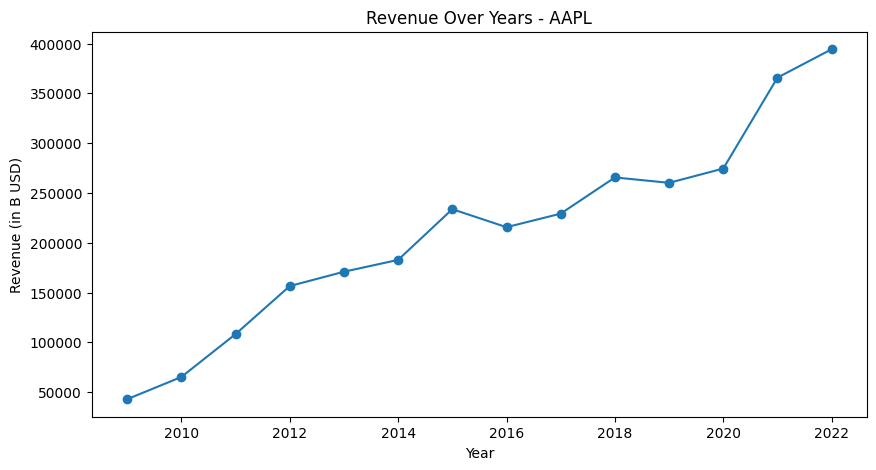

In [131]:
import matplotlib.pyplot as  plt

company_df = df[df['Company'] == 'AAPL']

plt.figure(figsize=(10,5))

plt.plot(company_df['Year'], company_df['Revenue'], marker='o')
plt.title("Revenue Over Years - AAPL")
plt.xlabel("Year")
plt.ylabel("Revenue (in B USD)")
plt.show()

### quick check if data on plot is consistant with what we have

In [132]:
company_df = df[df['Company'] == 'AAPL']
company_df


Year Company Category  Market_Cap_BUSD   Revenue  Gross_Profit  \
0   2022    AAPL       IT          2066.94  394328.0      170782.0   
1   2021    AAPL       IT          2913.28  365817.0      152836.0   
2   2020    AAPL       IT          2255.97  274515.0      104956.0   
3   2019    AAPL       IT          1304.76  260174.0       98392.0   
4   2018    AAPL       IT           748.54  265595.0      101839.0   
5   2017    AAPL       IT           868.87  229234.0       88186.0   
6   2016    AAPL       IT           617.59  215639.0       84263.0   
7   2015    AAPL       IT           586.86  233715.0       93626.0   
8   2014    AAPL       IT           647.36  182795.0       70537.0   
9   2013    AAPL       IT           504.79  170910.0       64304.0   
10  2012    AAPL       IT           500.61  156508.0       68662.0   
11  2011    AAPL       IT           376.40  108249.0       43818.0   
12  2010    AAPL       IT           296.89   65225.0       25684.0   
13  2009    AAPL       IT           189.80   42905.0       17222.0   

    Net_Income  Earnings_Per_Share    EBITDA  Shareholder_Equity  ...    ROA  \
0      99803.0                6.11  130541.0             50672.0  ...  28.29   
1      94680.0                5.61  120233.0             63090.0  ...  26.97   
2      57411.0                3.28   77344.0             65339.0  ...  17.73   
3      55256.0                2.97   76477.0             90488.0  ...  16.32   
4      59531.0                2.98   81801.0            107147.0  ...  16.28   
5      48351.0                2.30   71501.0            134047.0  ...  12.88   
6      45687.0                2.08   70529.0            128249.0  ...  14.20   
7      53394.0                2.31   82487.0            119355.0  ...  18.39   
8      39510.0                1.61   60449.0            111547.0  ...  17.04   
9      37037.0                1.42   55756.0            123549.0  ...  17.89   
10     41733.0                1.58   58518.0            118210.0  ...  23.70   
11     25922.0                0.99   35604.0             76615.0  ...  22.28   
12     14013.0                0.54   19412.0             47791.0  ...  18.64   
13      8235.0                0.32   12474.0             31640.0  ...  17.34   

      ROI  Net_Profit_Margin  Free_CashFlow_Per_Share  \
0   66.70          25.309641                     1.31   
1   54.98          25.881793                     1.33   
2   35.01          20.913611                     1.02   
3   30.31          21.238095                    -0.04   
4   29.63          22.414202                     0.74   
5   20.91          21.092421                     0.03   
6   22.43          21.186798                    -0.59   
7   30.92          22.845774                     0.97   
8   28.11          21.614377                     0.30   
9   26.36          21.670470                     0.14   
10  35.30          26.665091                     0.34   
11  33.83          23.946642                     0.63   
12  29.32          21.484094                     0.29   
13  26.03          19.193567                     0.36   

    Return_on_Tangible_Equity  Number_of_Employees  Inflation_Rate_US  \
0                      196.96               164000               8.00   
1                      150.07               154000               4.70   
2                       87.87               147000               1.23   
3                       61.06               137000               1.81   
4                       55.56               132000               2.44   
5                       36.07               123000               2.13   
6                       38.19               116000               1.26   
7                       48.39               110000               0.12   
8                       38.44                97000               1.62   
9                       31.44                84400               1.46   
10                      36.98                76100               2.07   
11                  

### Gaining insights about the revenue for the total group in the statement 


#### that is done seperately and when they are together for further comprehension and ease of comparasion 

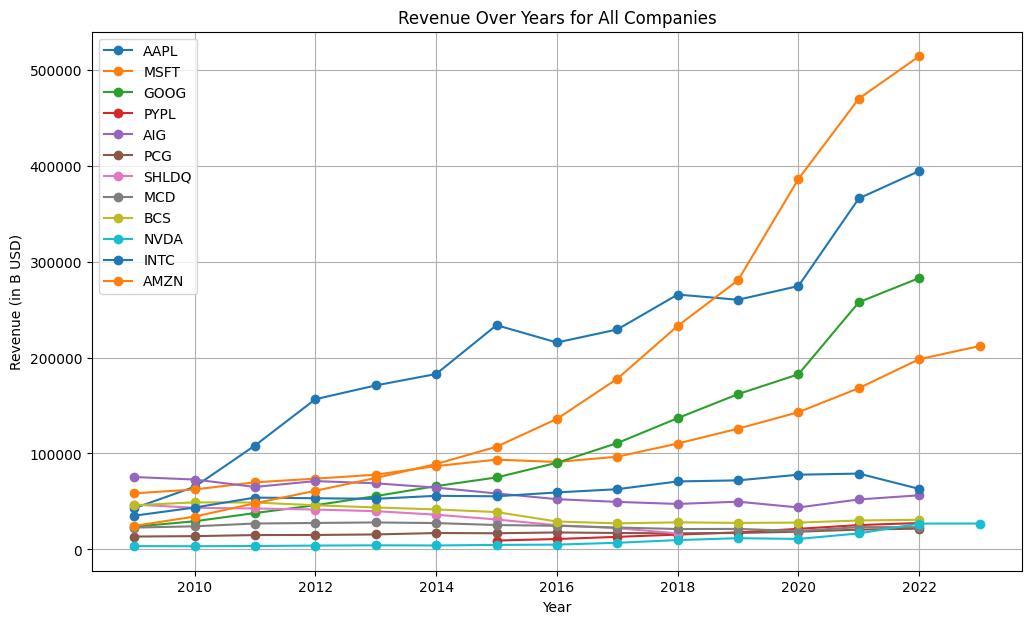

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

for company in df["Company"].unique():
    company_df= df[df["Company"]==company]
    plt.plot(company_df['Year'],company_df['Revenue'],marker='o',label=company)
plt.title("Revenue Over Years for All Companies")
plt.xlabel("Year")
plt.ylabel("Revenue (in B USD)")
plt.legend()
plt.grid(True)
plt.show()    

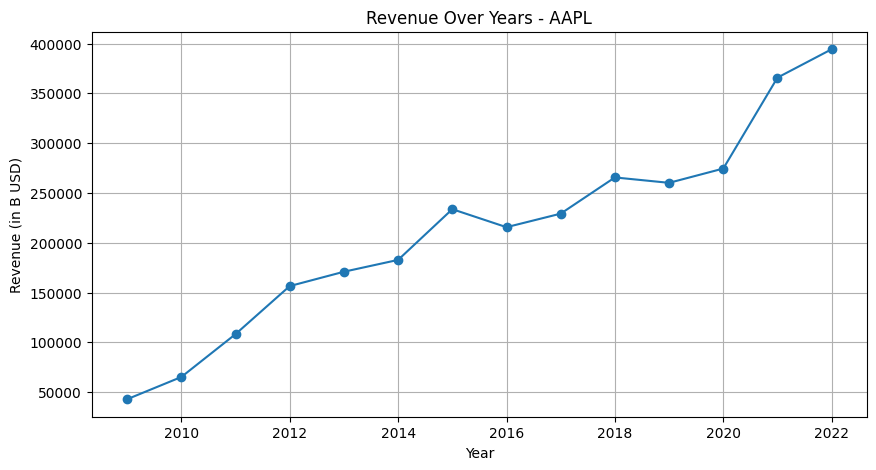

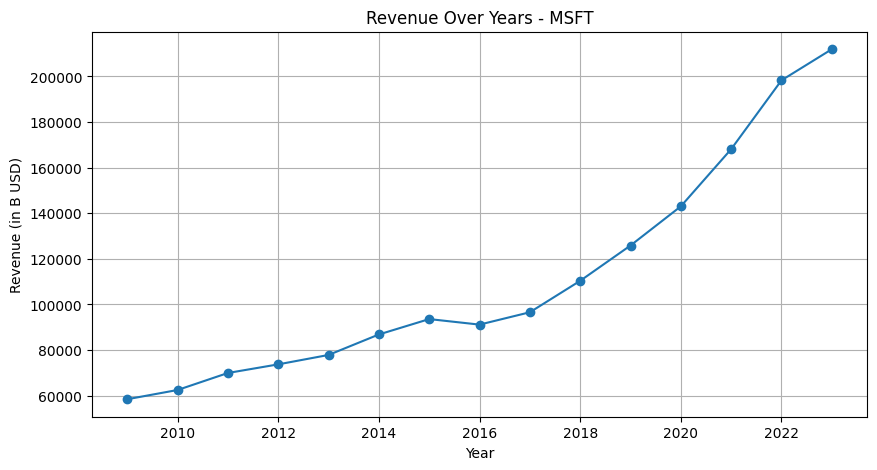

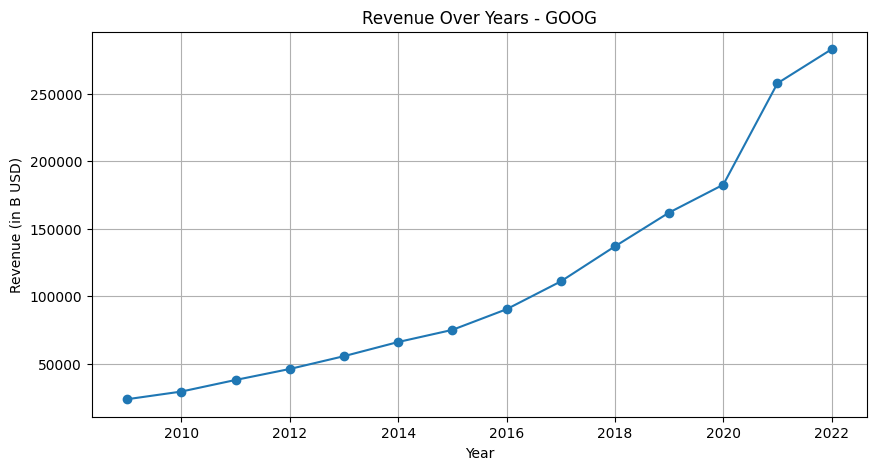

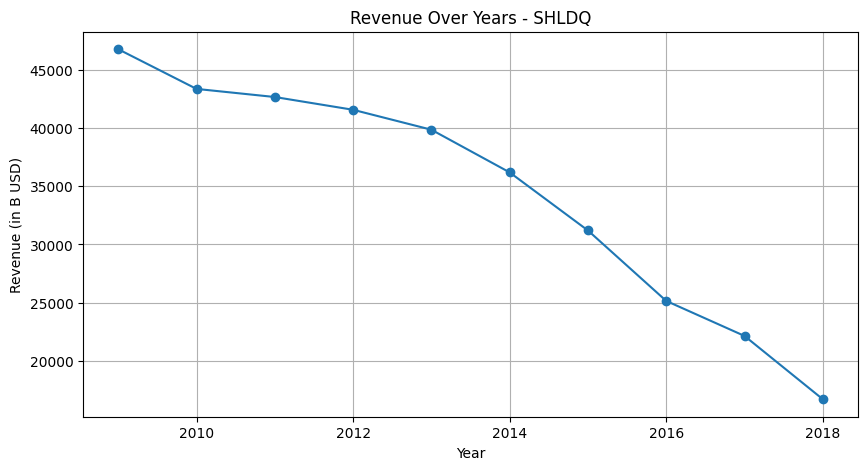

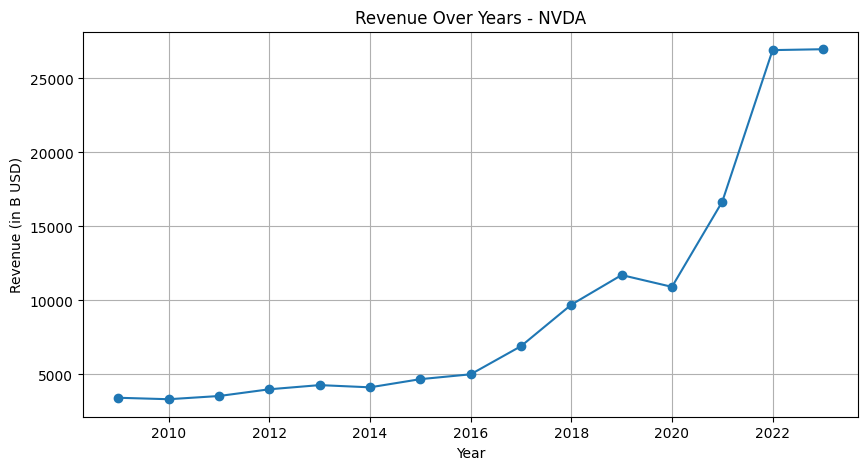

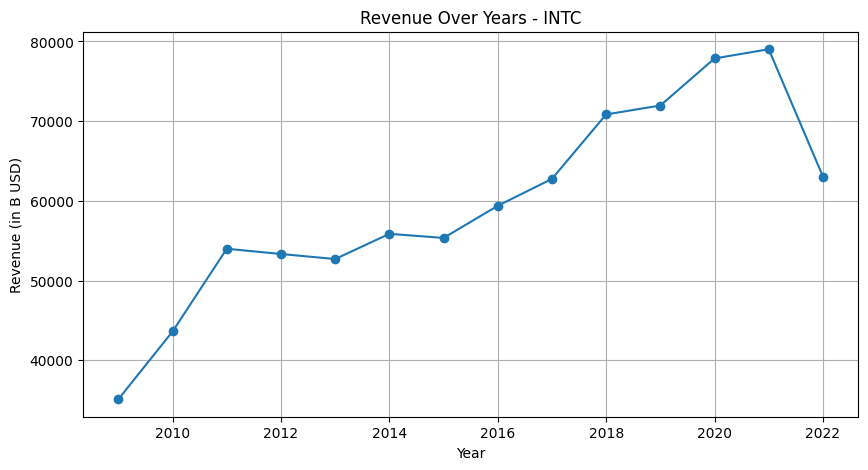

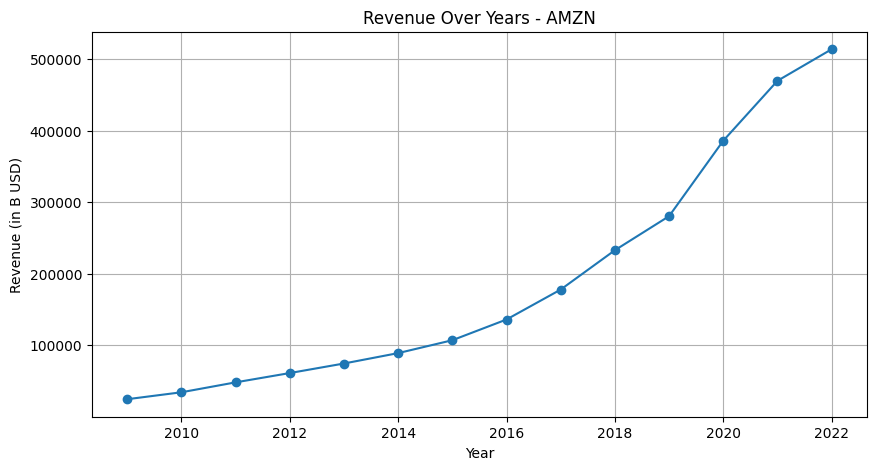

In [134]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['Revenue'], marker='o')
    plt.title(f"Revenue Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("Revenue (in B USD)")
    plt.grid(True)
    plt.show()


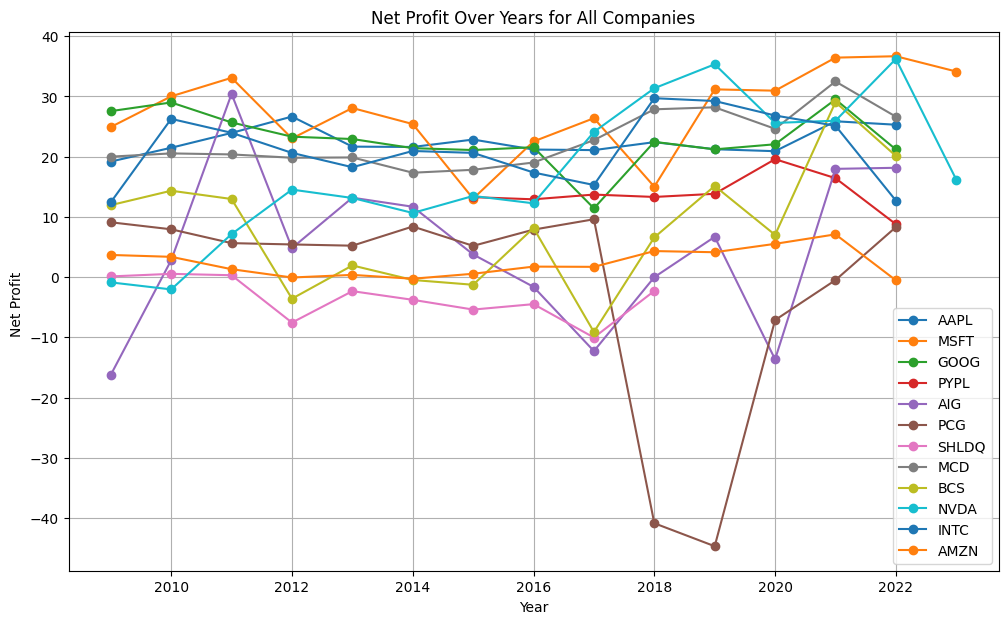

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

for company in df["Company"].unique():
    company_df= df[df["Company"]==company]
    plt.plot(company_df['Year'],company_df['Net_Profit_Margin'],marker='o',label=company)
plt.title("Net Profit Over Years for All Companies")
plt.xlabel("Year")
plt.ylabel("Net Profit ")
plt.legend()
plt.grid(True)
plt.show()    

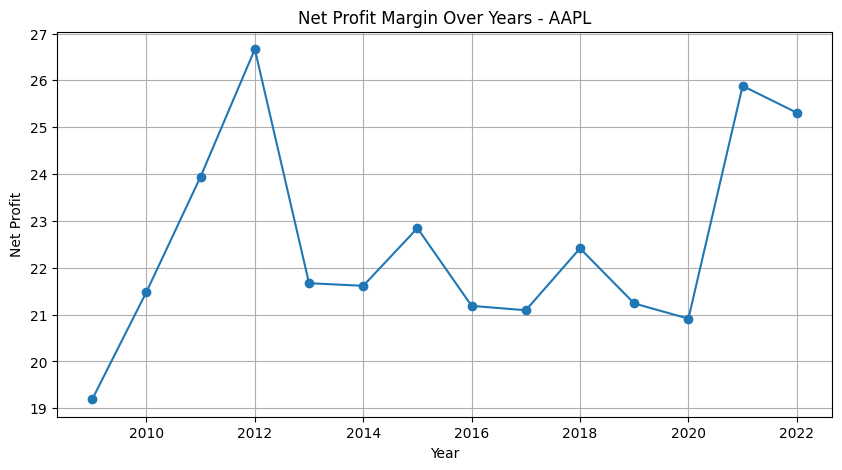

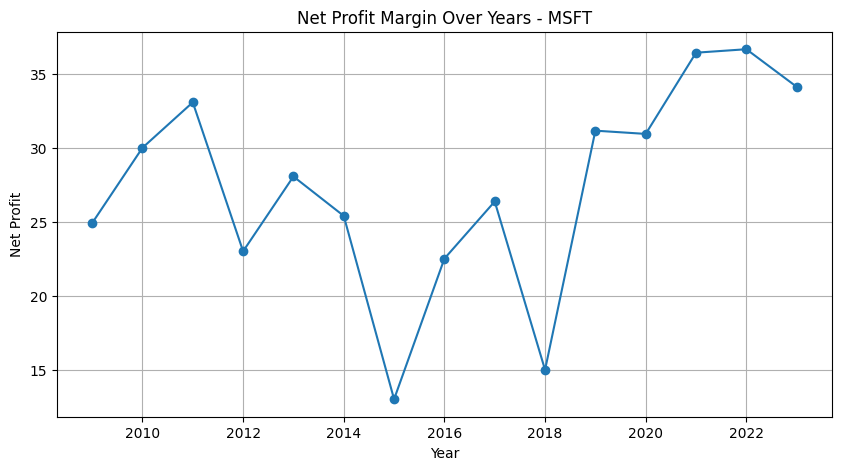

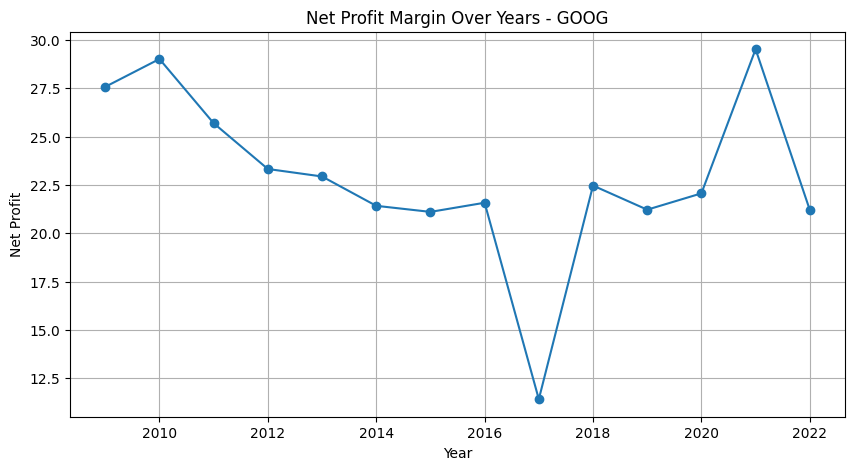

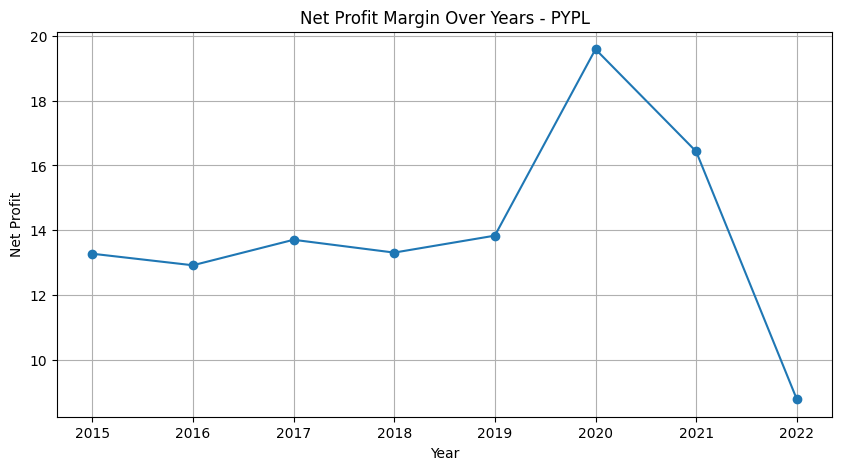

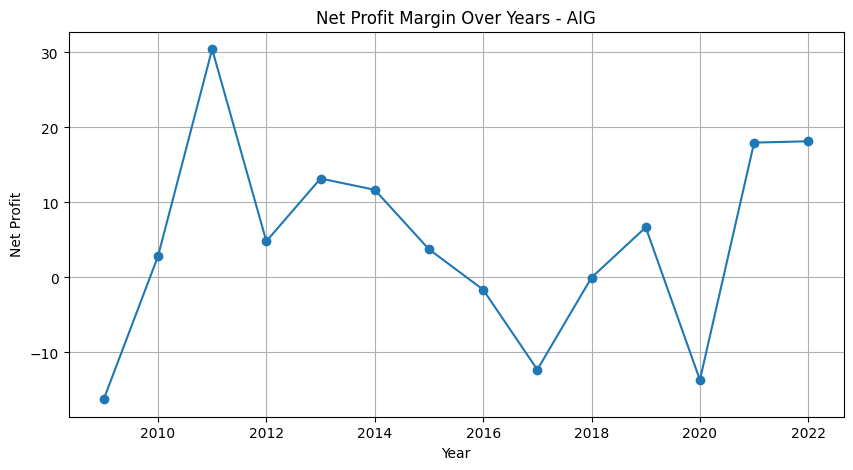

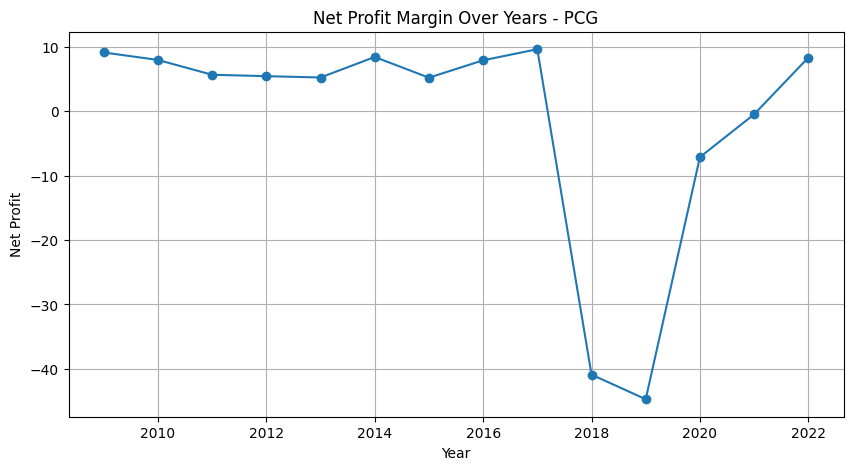

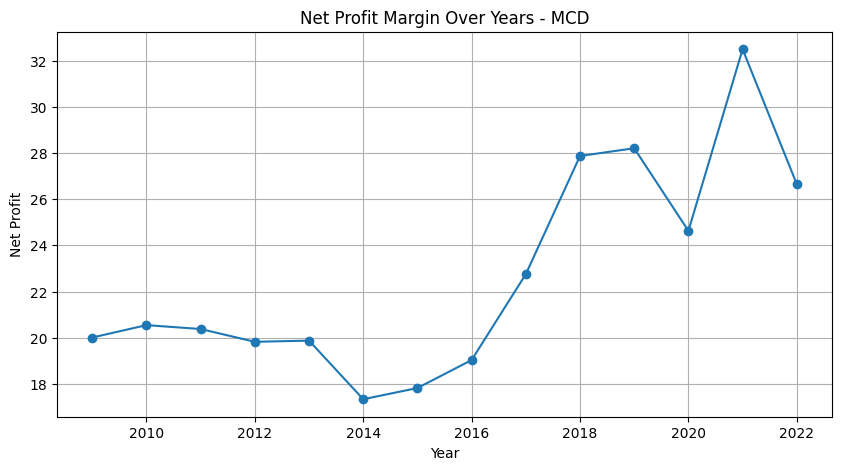

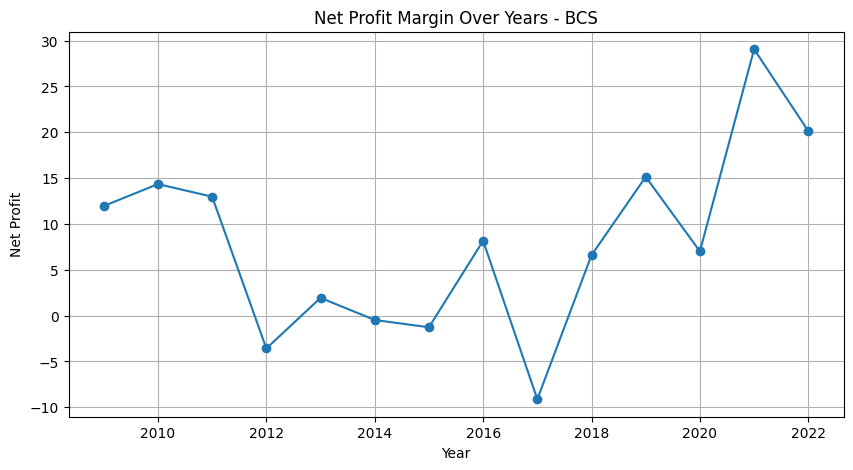

In [138]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['Net_Profit_Margin'], marker='o')
    plt.title(f"Net Profit Margin Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("Net Profit")
    plt.grid(True)
    plt.show()


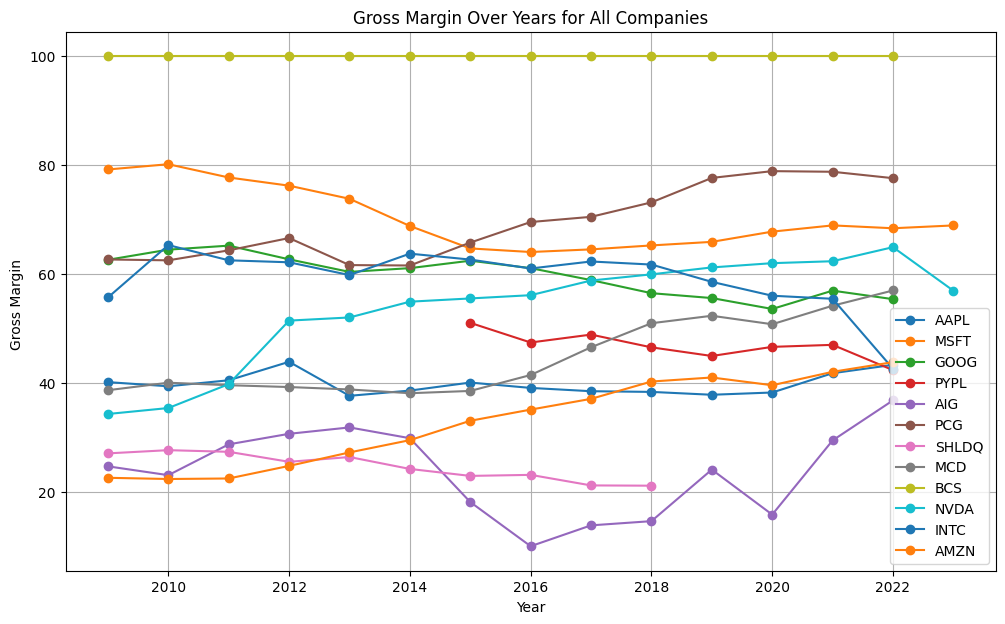

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

for company in df["Company"].unique():
    company_df= df[df["Company"]==company]
    plt.plot(company_df['Year'],company_df['Gross_Margin'],marker='o',label=company)
plt.title("Gross Margin Over Years for All Companies")
plt.xlabel("Year")
plt.ylabel("Gross Margin ")
plt.legend()
plt.grid(True)
plt.show()    

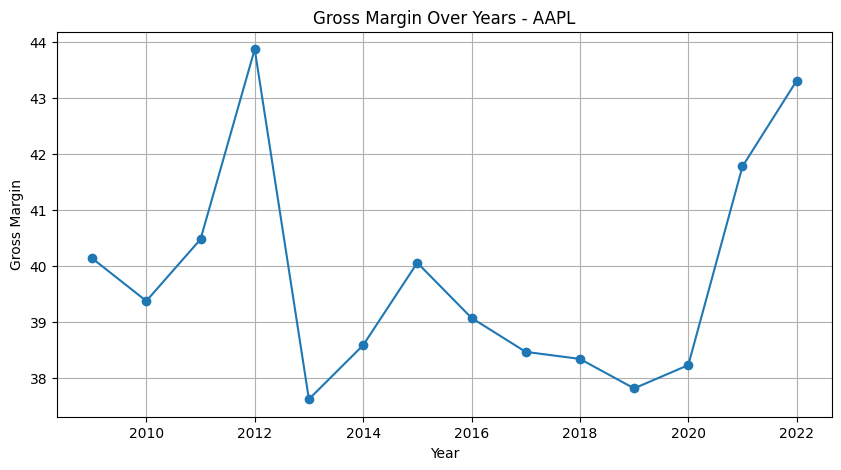

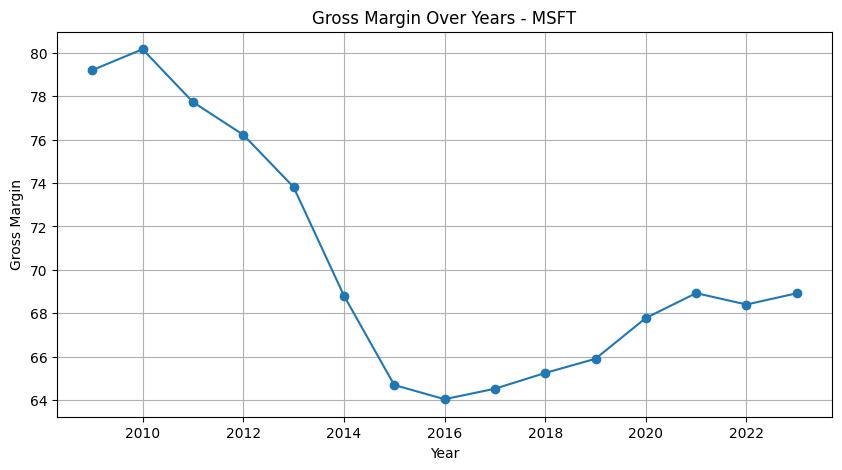

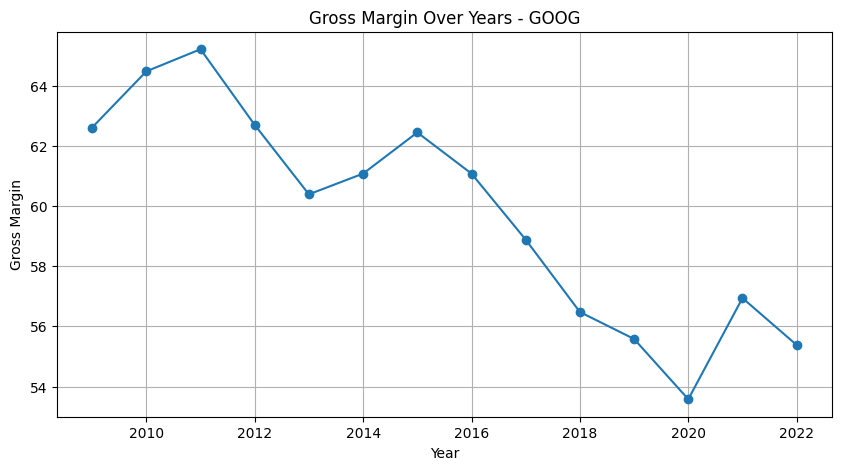

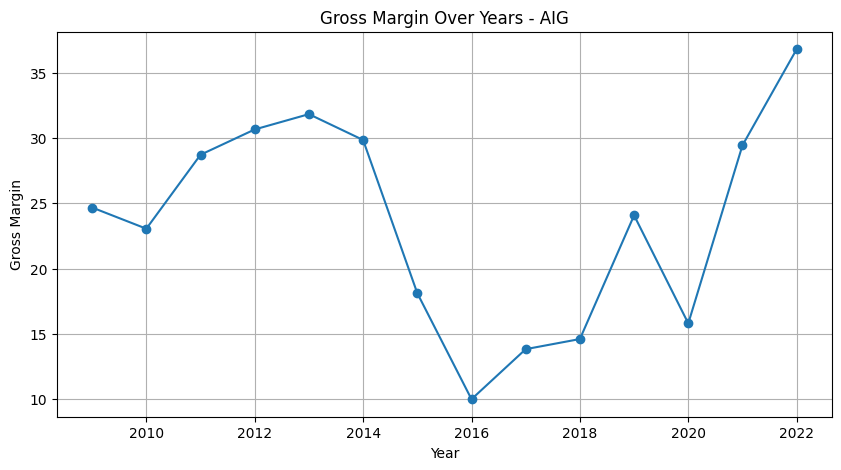

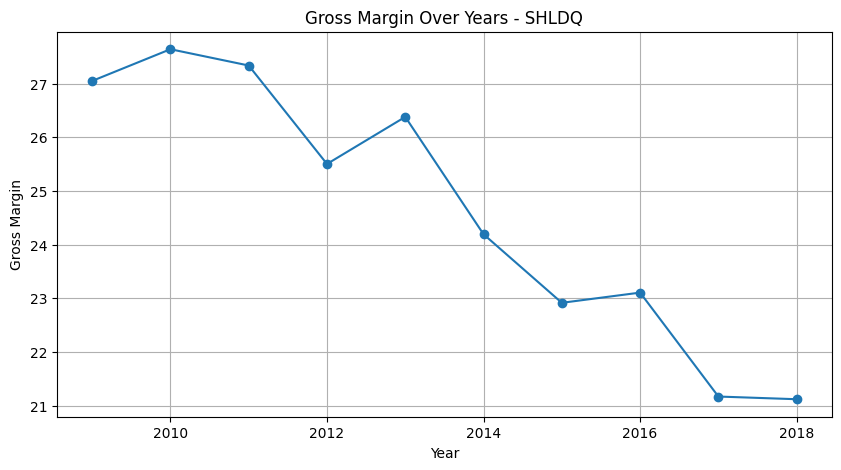

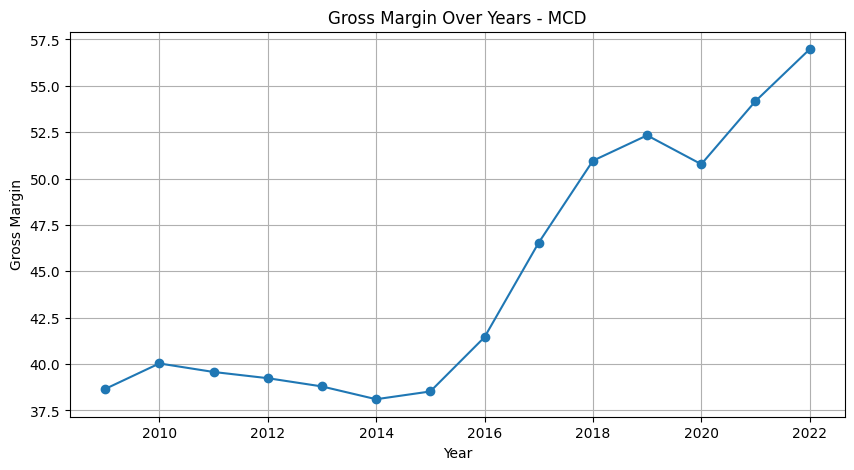

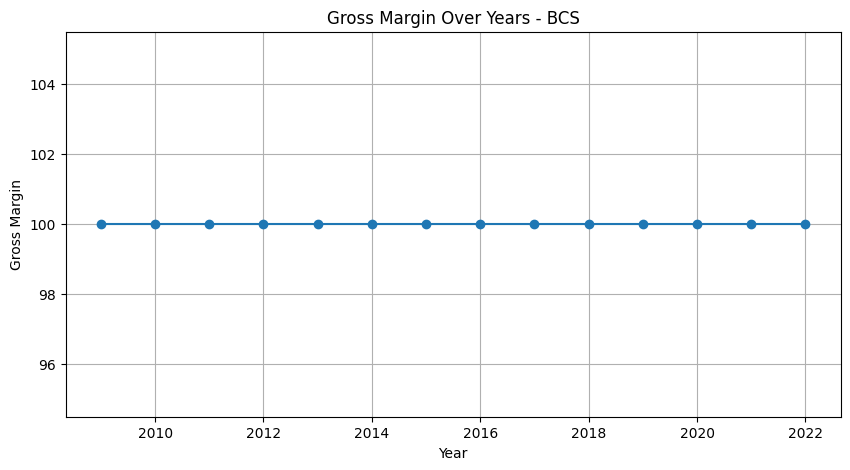

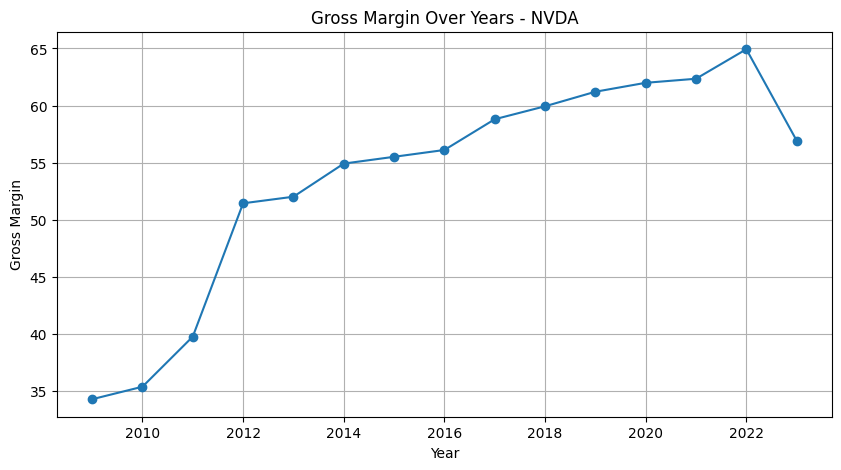

In [140]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['Gross_Margin'], marker='o')
    plt.title(f"Gross Margin Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("Gross Margin")
    plt.grid(True)
    plt.show()

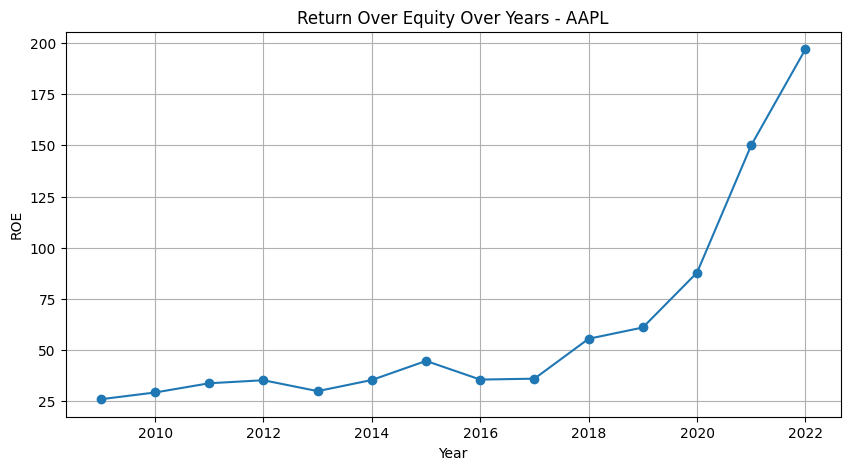

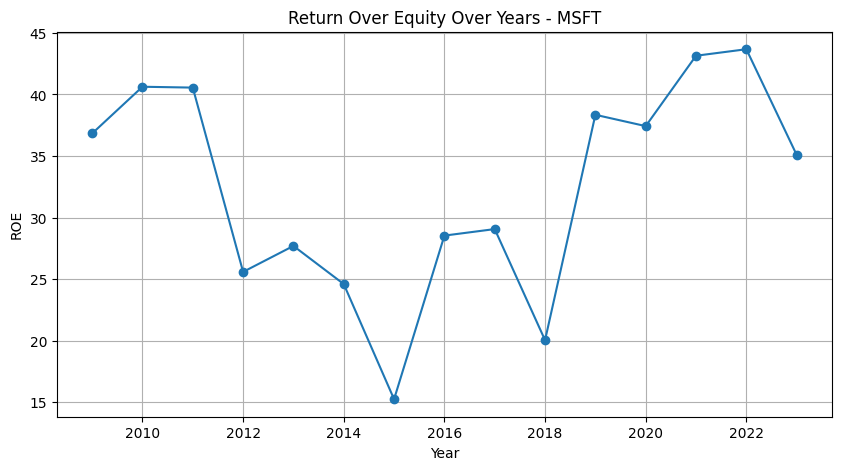

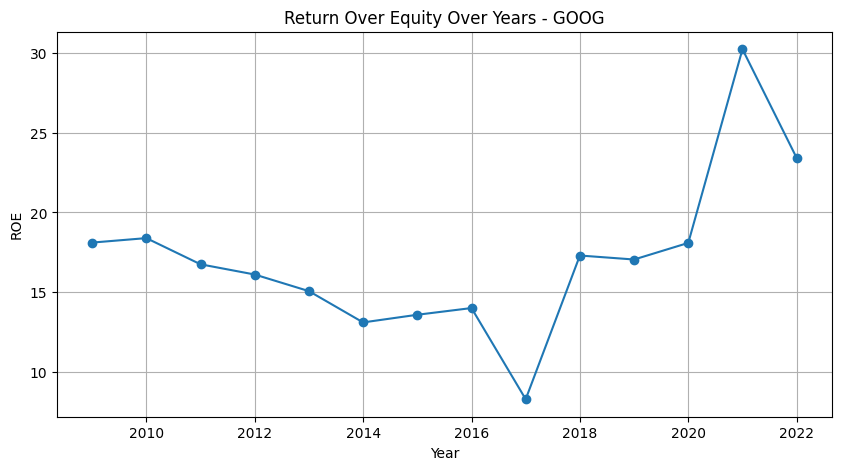

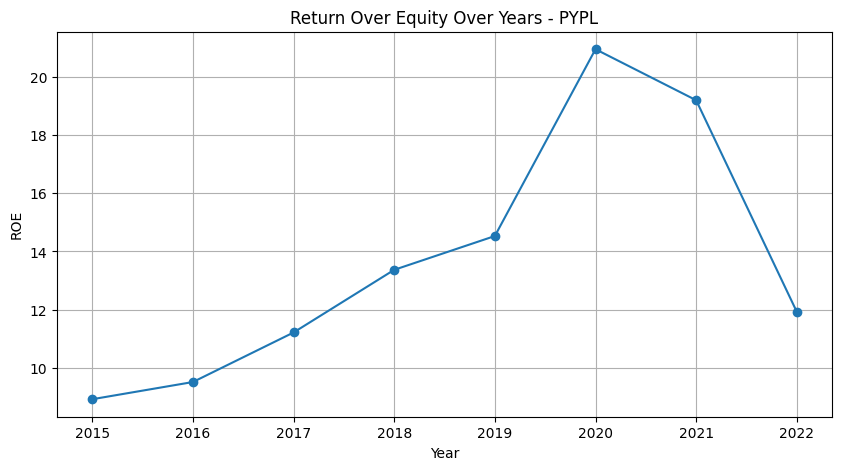

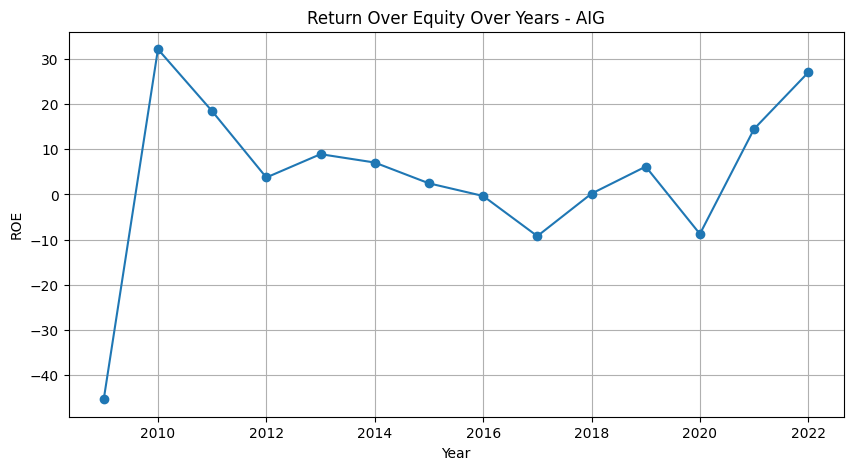

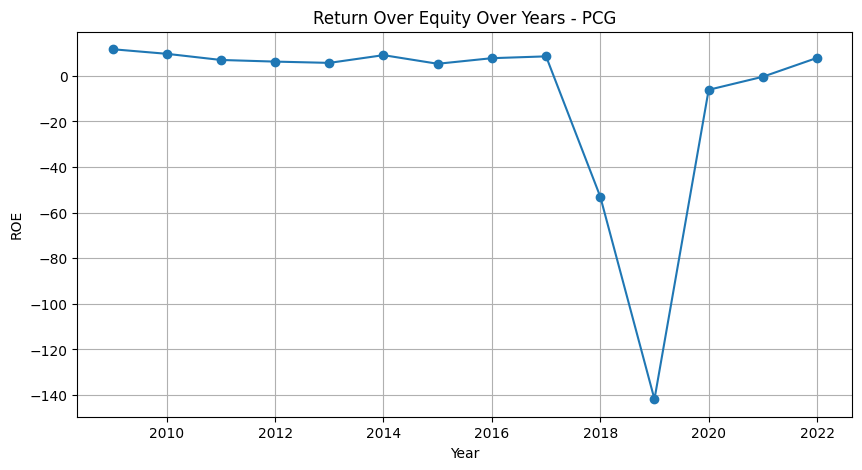

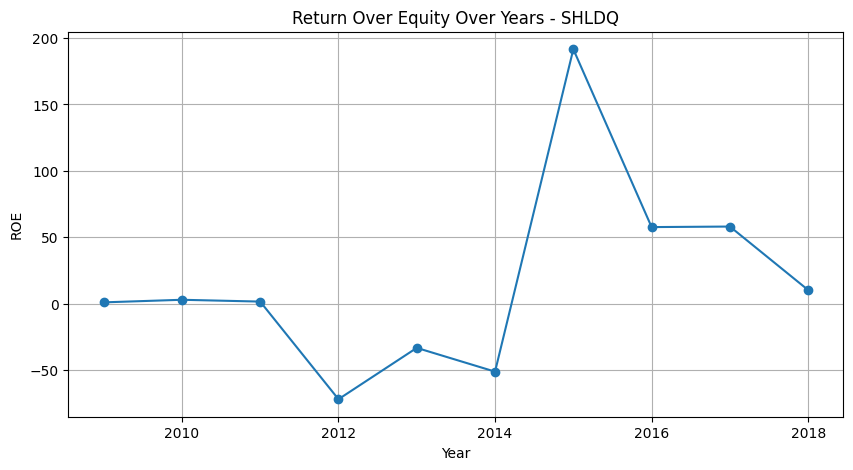

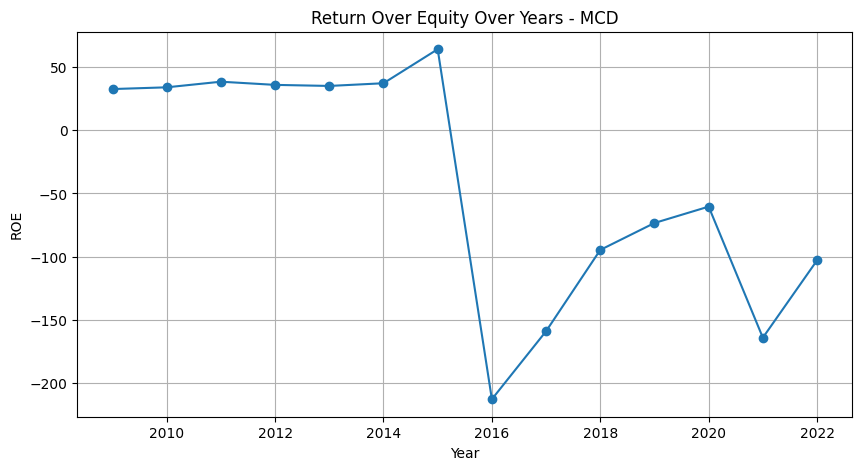

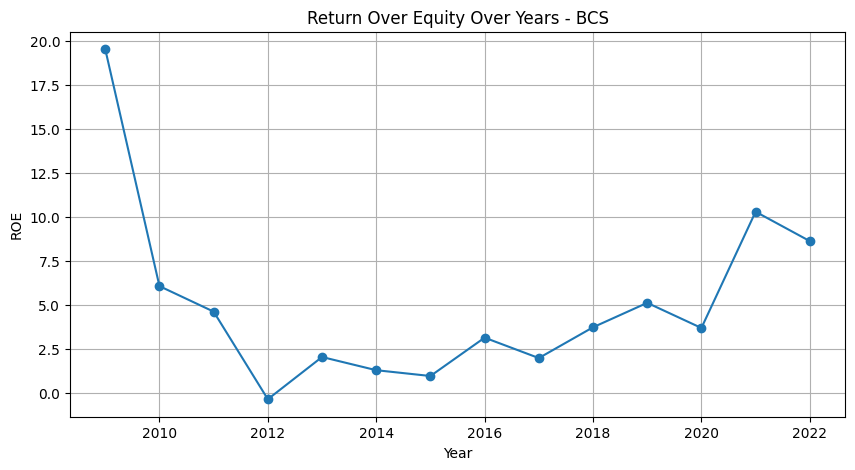

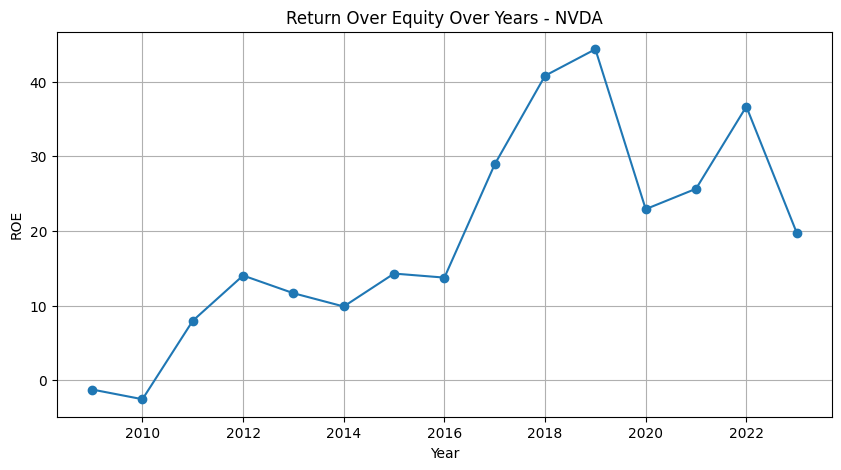

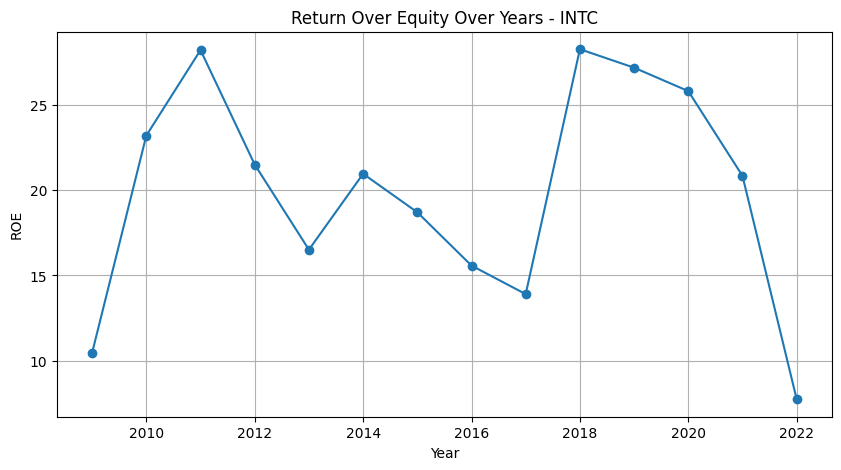

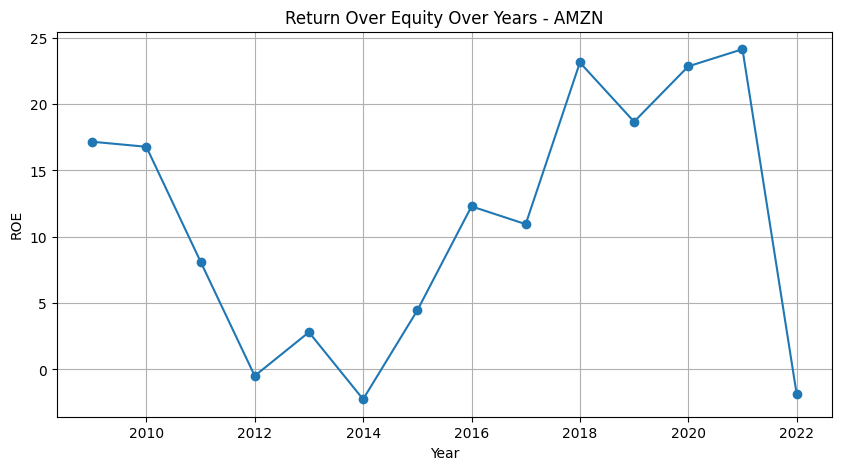

In [141]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['ROE'], marker='o')
    plt.title(f"Return Over Equity Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("ROE")
    plt.grid(True)
    plt.show()

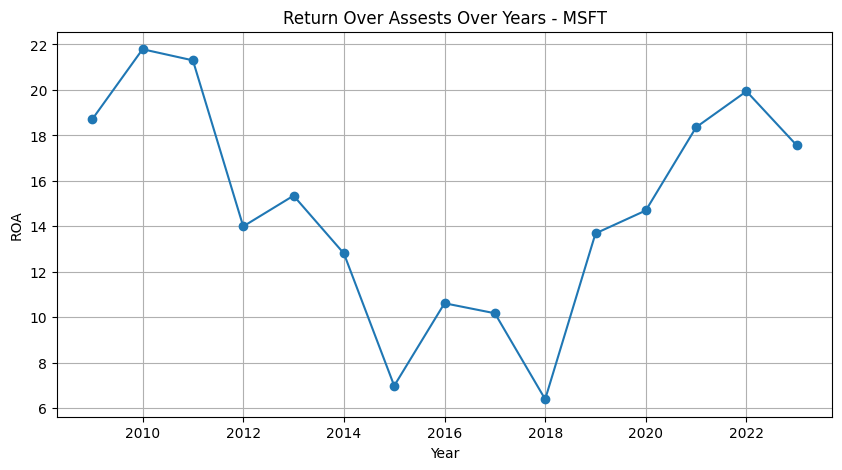

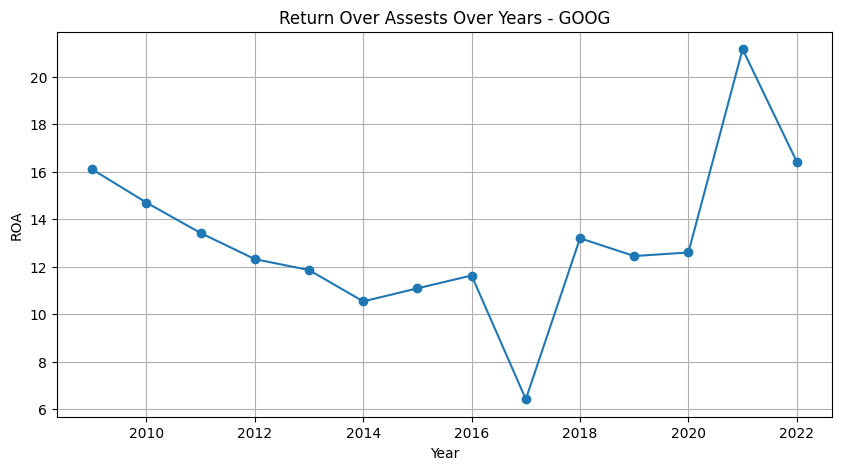

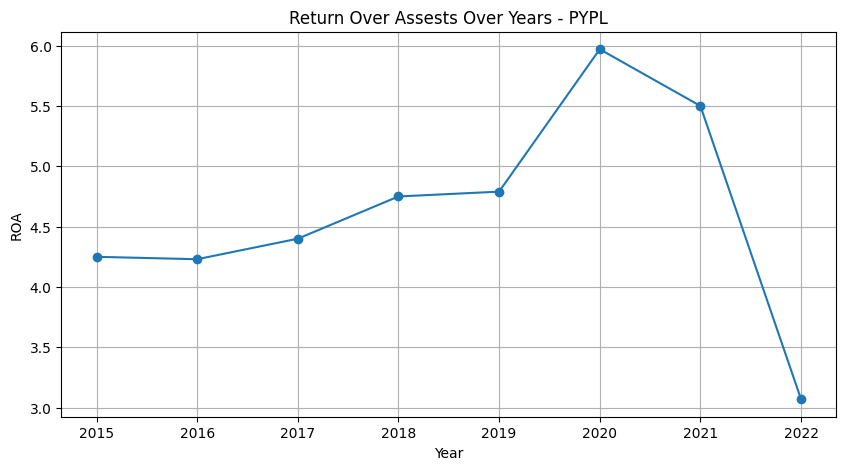

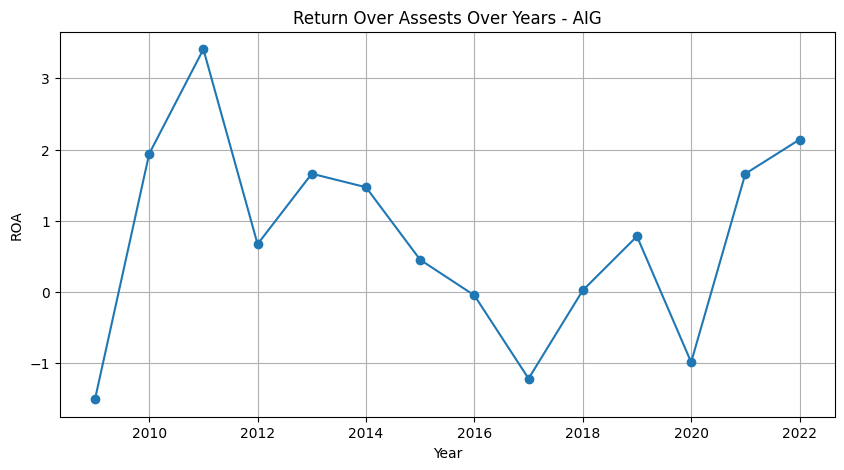

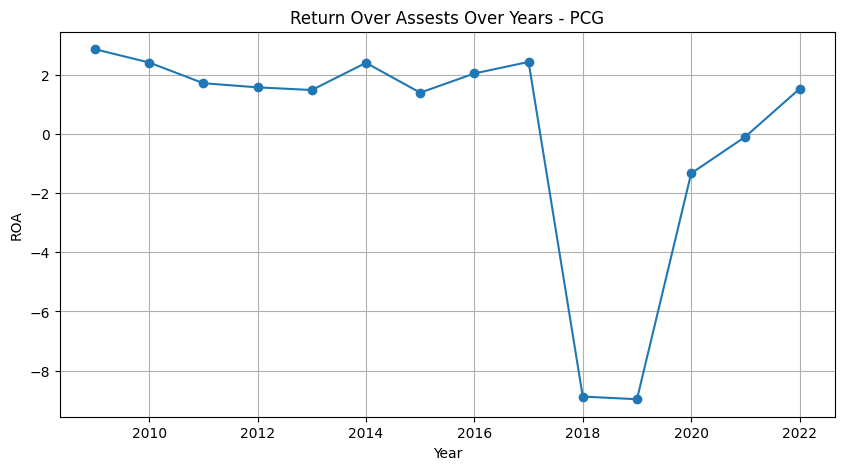

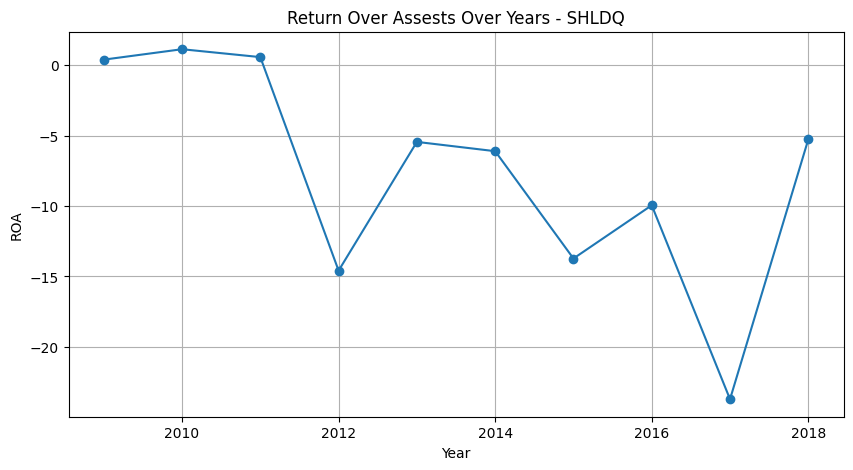

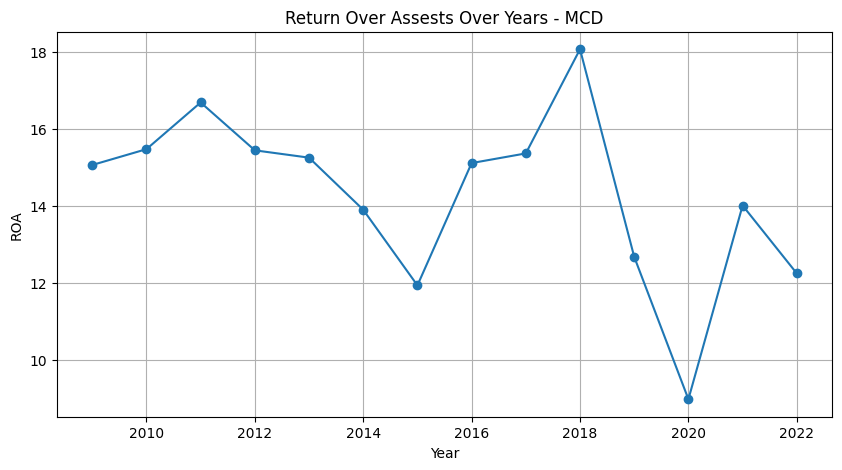

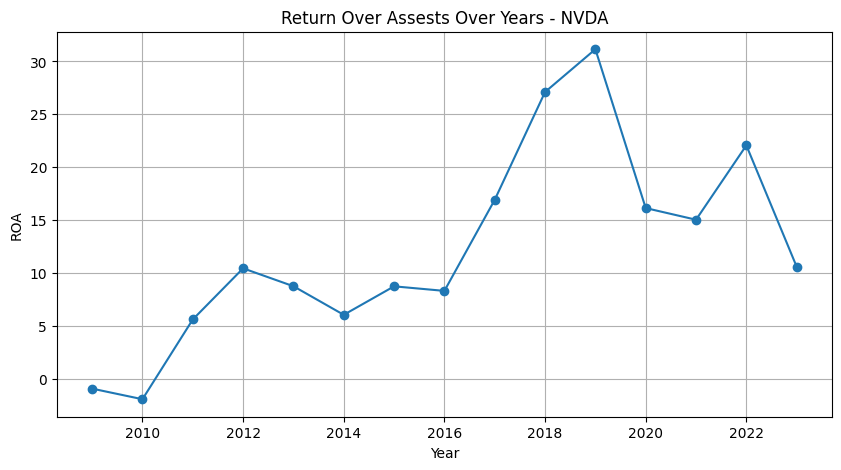

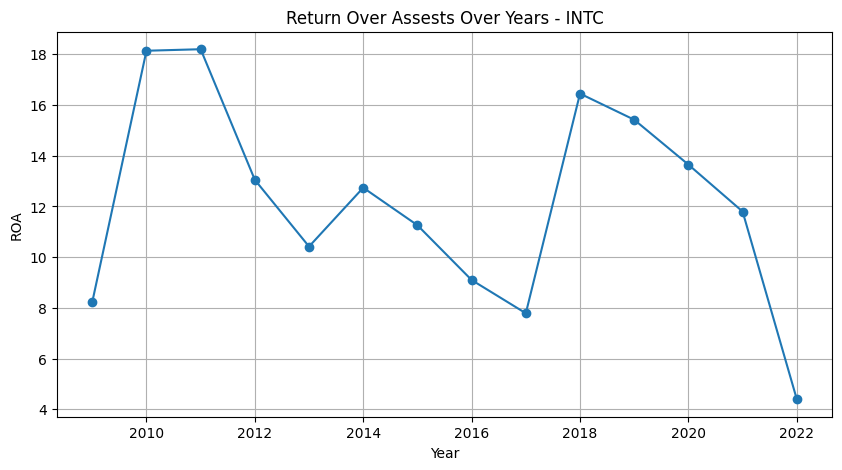

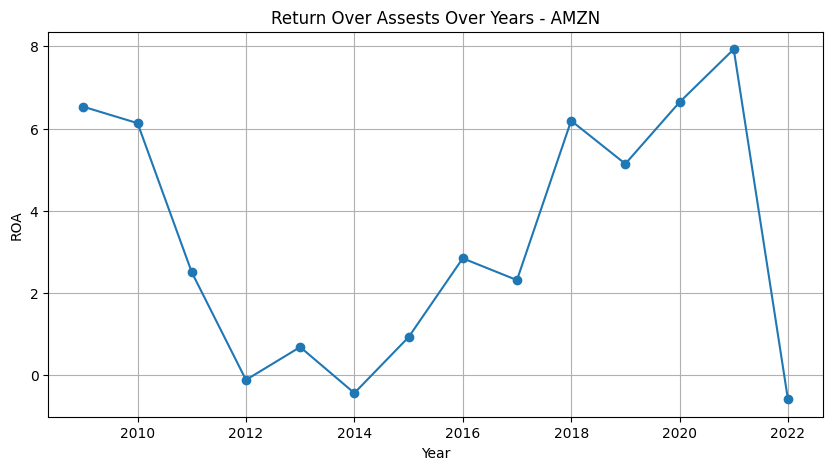

In [142]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['ROA'], marker='o')
    plt.title(f"Return Over Assests Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("ROA")
    plt.grid(True)
    plt.show()

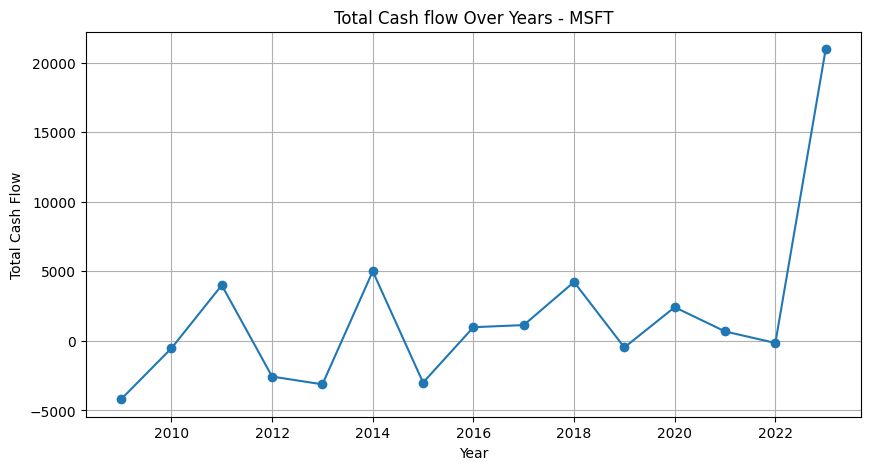

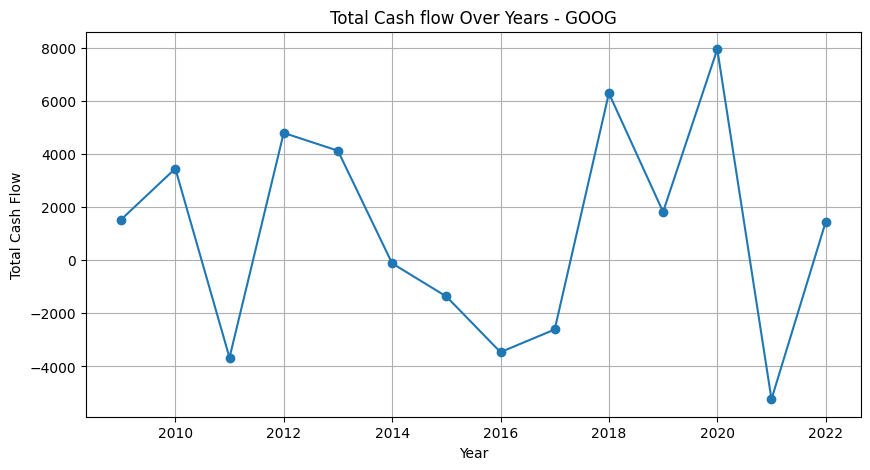

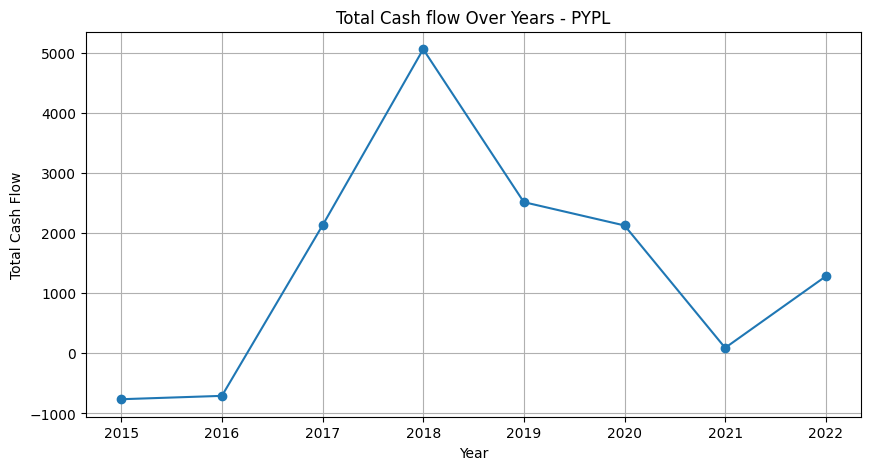

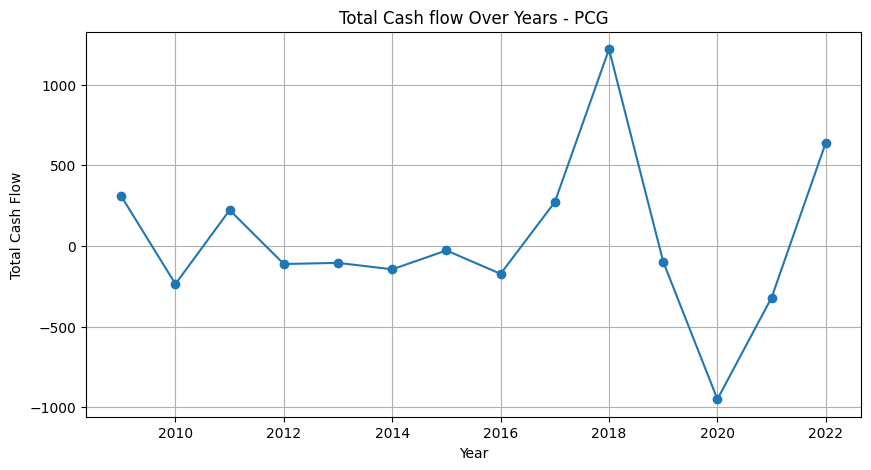

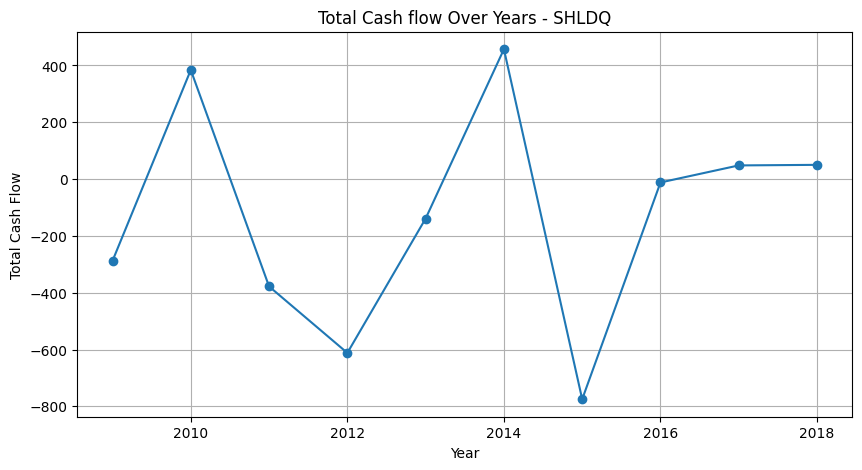

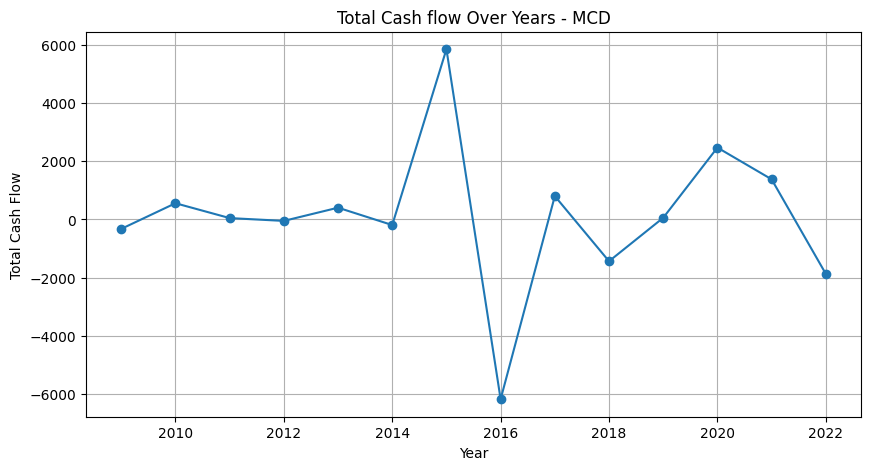

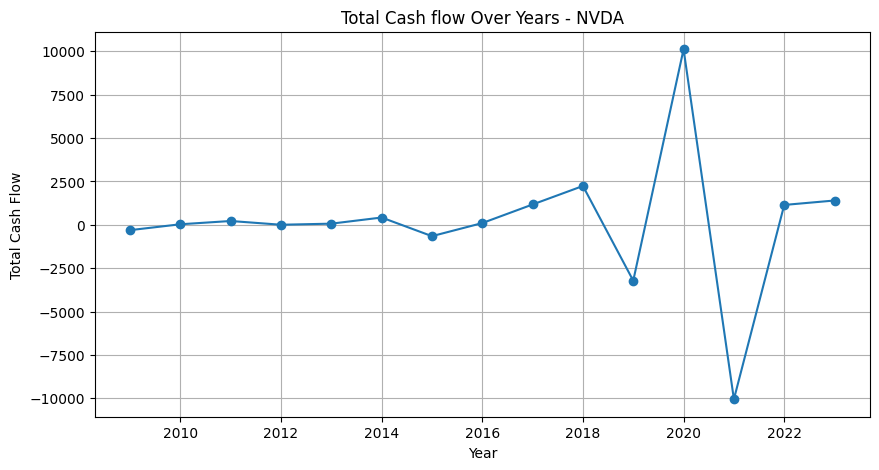

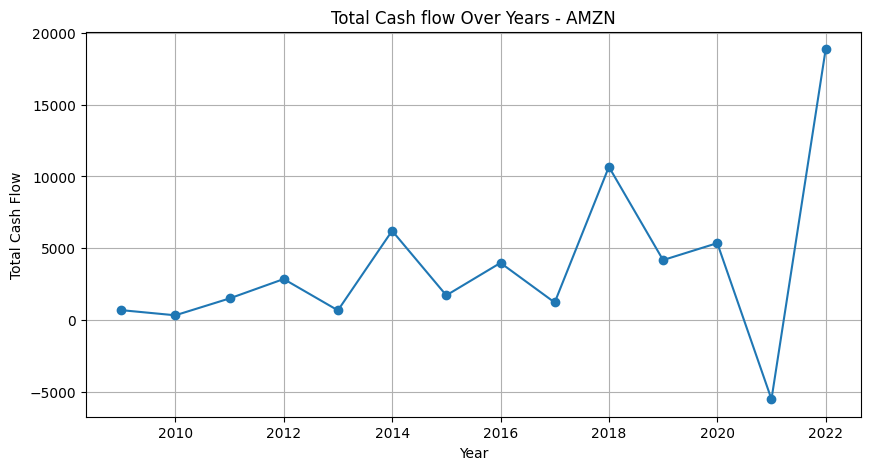

In [146]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['Total_Cash_Flow'], marker='o')
    plt.title(f"Total Cash flow Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("Total Cash Flow")
    plt.grid(True)
    plt.show()

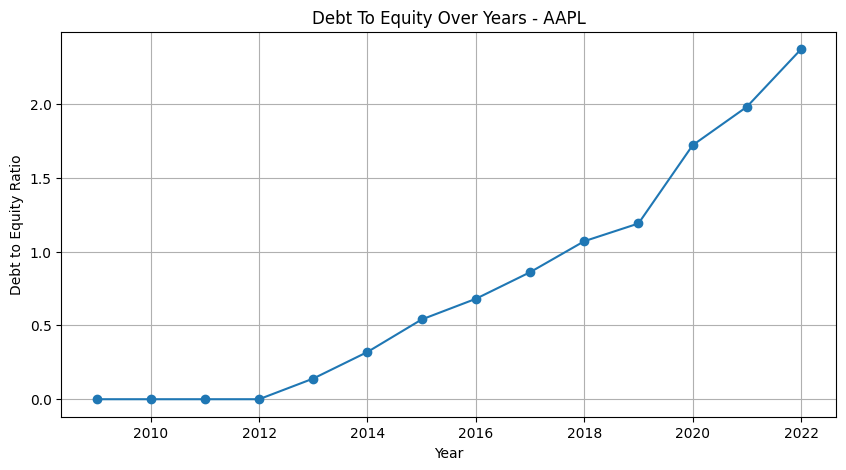

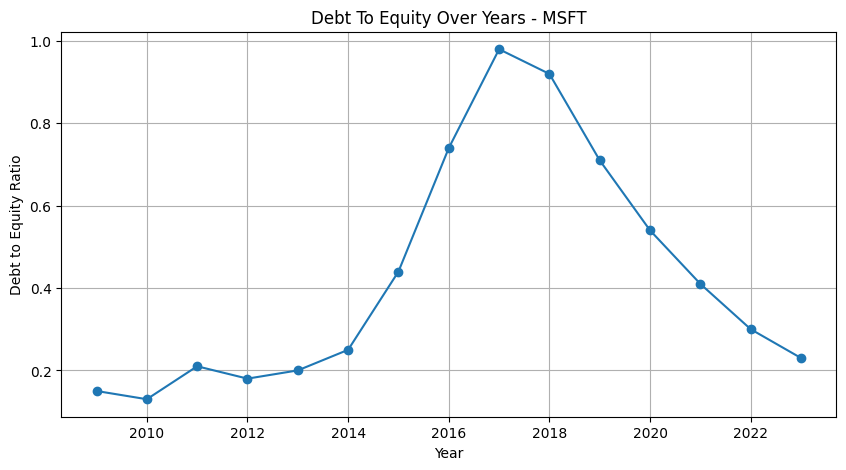

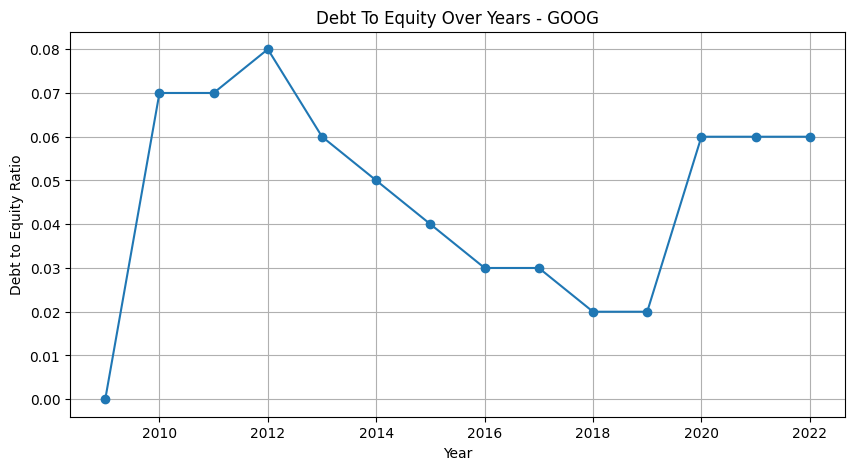

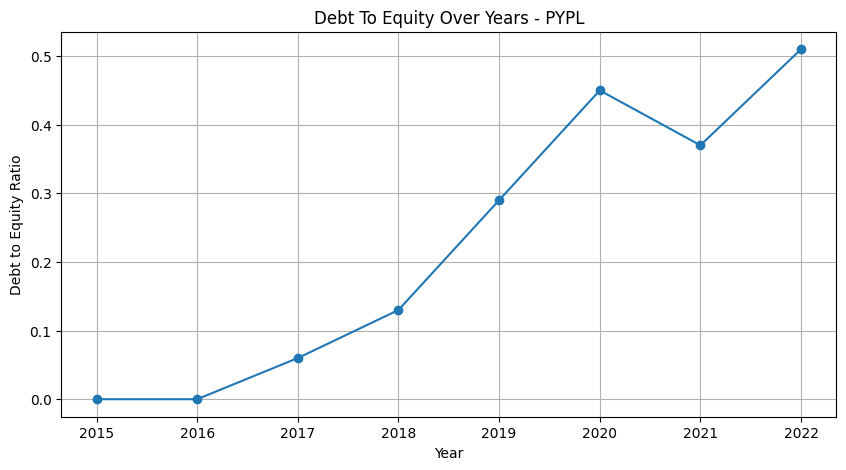

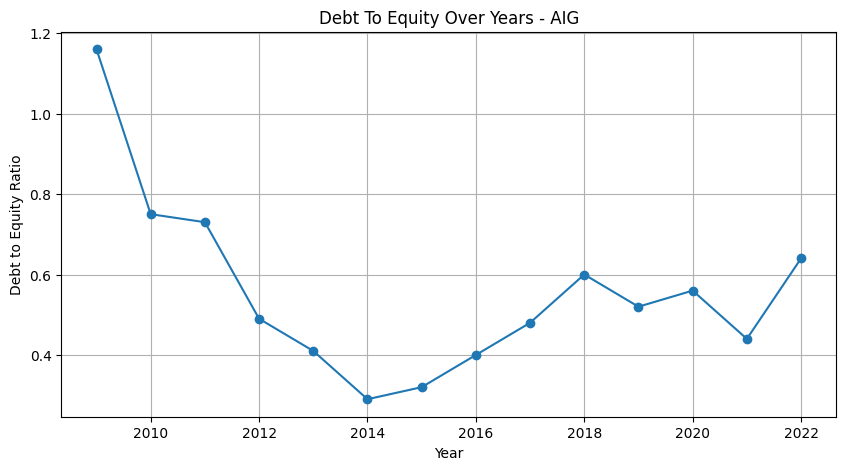

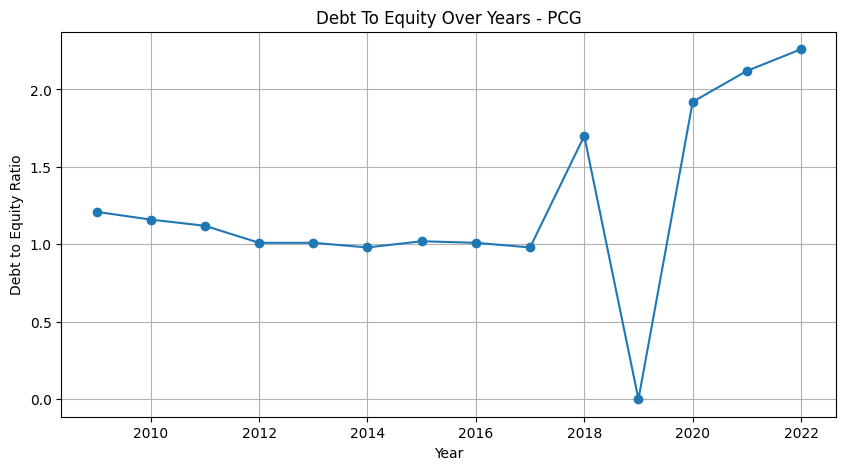

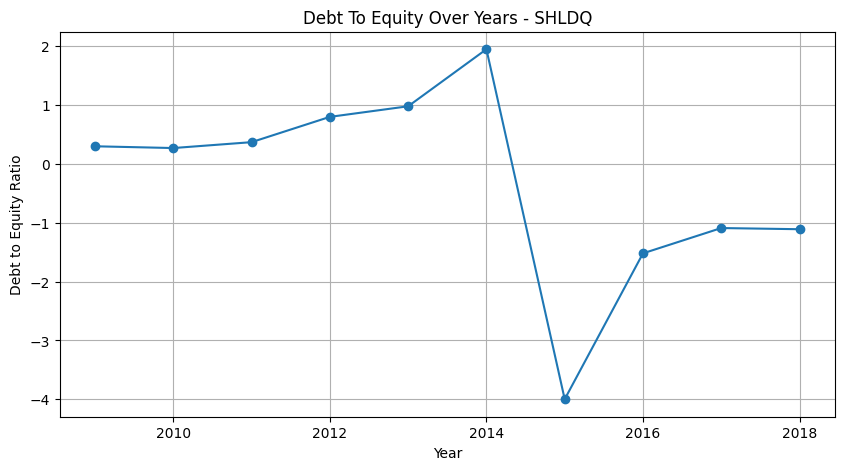

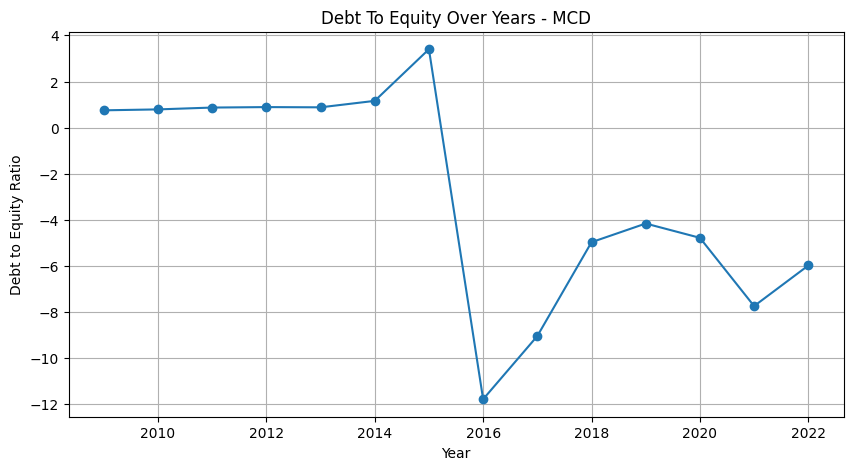

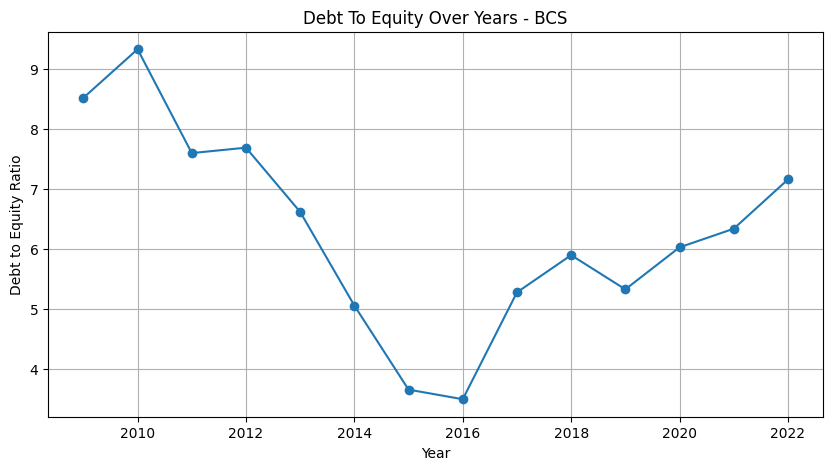

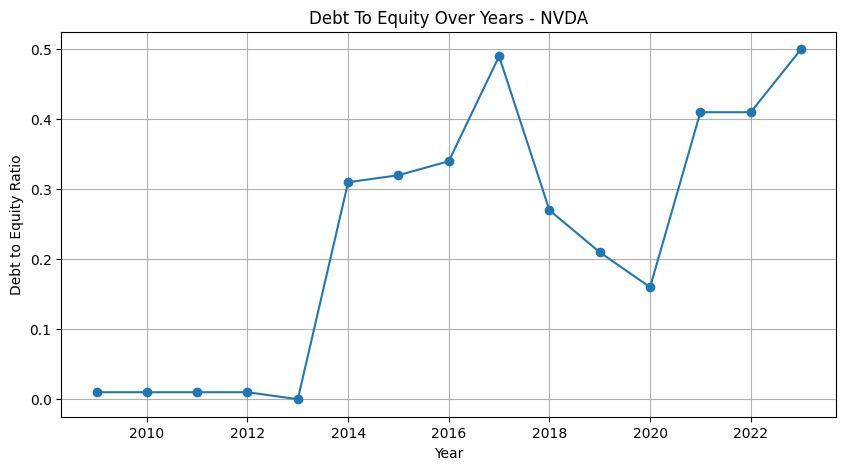

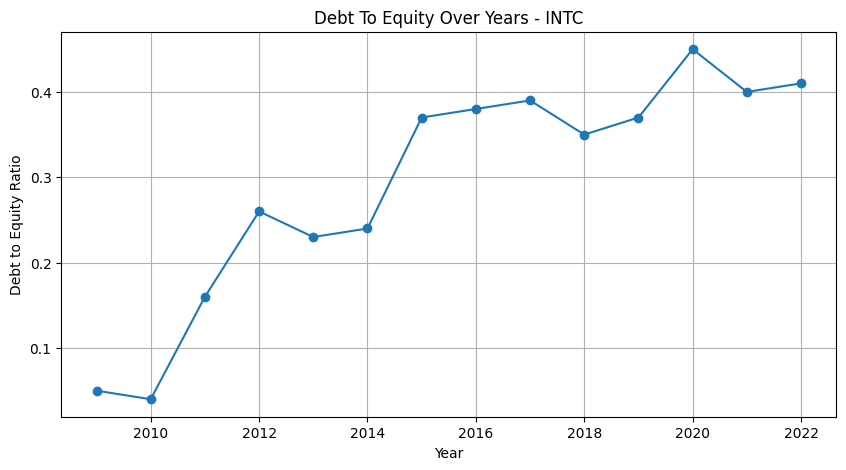

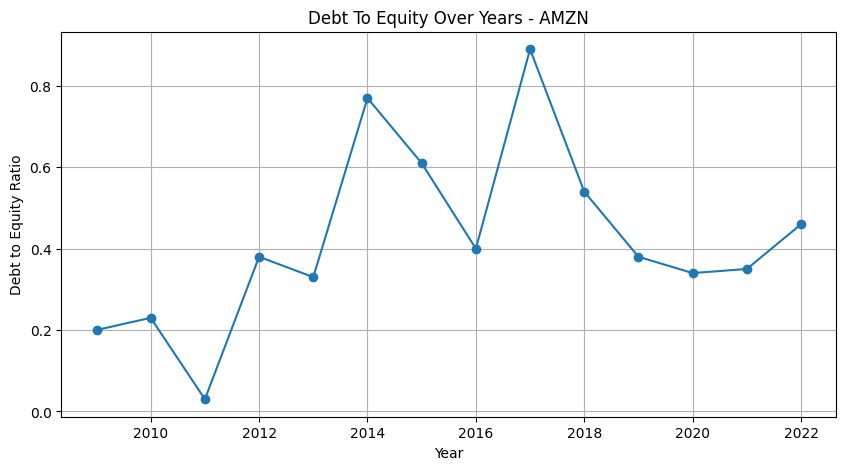

In [148]:
for company in df['Company'].unique():
    company_df = df[df['Company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_df['Year'], company_df['Debt_Equity_Ratio'], marker='o')
    plt.title(f"Debt To Equity Over Years - {company}")
    plt.xlabel("Year")
    plt.ylabel("Debt to Equity Ratio")
    plt.grid(True)
    plt.show()

### Based On the previous Analysis and insights we can gain the following results about the best and the worst performance 

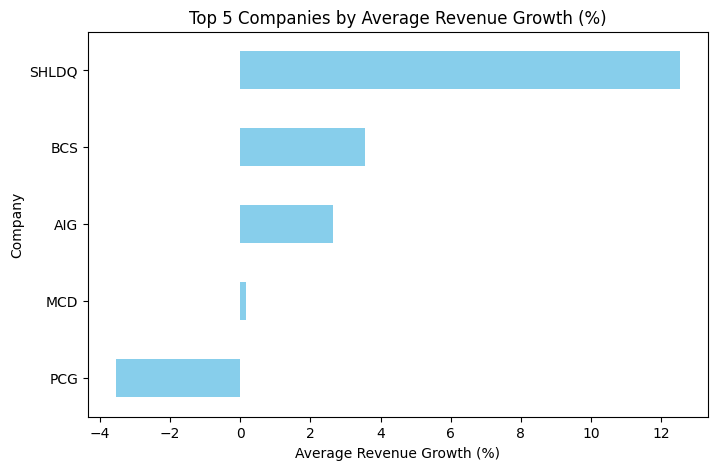

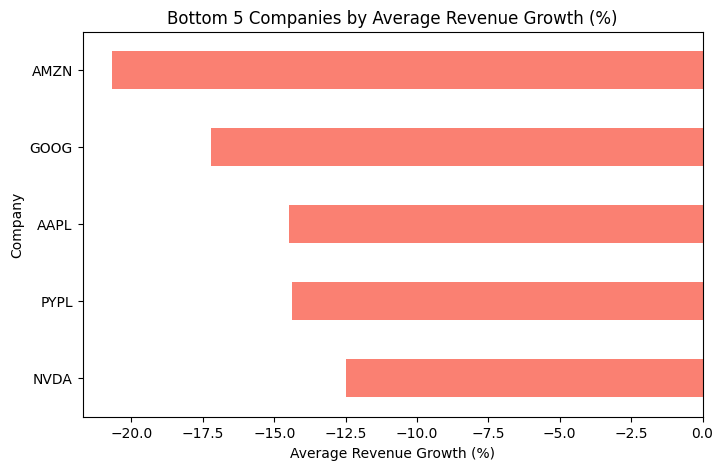

In [ ]:

avg_growth = df.groupby('Company')['Revenue_Growth_Percentage'].mean().sort_values(ascending=False)


top5 = avg_growth.head(5)

bottom5 = avg_growth.tail(5)

plt.figure(figsize=(8,5))
top5.plot(kind='barh', color='skyblue')
plt.title("Top 5 Companies by Average Revenue Growth (%)")
plt.xlabel("Average Revenue Growth (%)")
plt.ylabel("Company")
plt.gca().invert_yaxis()  
plt.show()


plt.figure(figsize=(8,5))
bottom5.plot(kind='barh', color='salmon')
plt.title("Bottom 5 Companies by Average Revenue Growth (%)")
plt.xlabel("Average Revenue Growth (%)")
plt.ylabel("Company")
plt.show()
